In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Excel file and display the first few rows
data = pd.read_csv('NASA.csv', skiprows=11) 
print(data.head())

   YEAR  MO  DY  HR    T2M  WS50M  ALLSKY_SFC_SW_DWN
0  2022   1   1   0  14.92   3.58                0.0
1  2022   1   1   1  14.87   3.34                0.0
2  2022   1   1   2  14.80   3.23                0.0
3  2022   1   1   3  14.81   3.23                0.0
4  2022   1   1   4  14.77   3.39                0.0


In [3]:
# Extract solar irradiance data
solar_irradiance = data['ALLSKY_SFC_SW_DWN']

# Extract ambient temperature data
ambient_temperature = data['T2M']

# Display the first few rows of extracted data
print("Solar Irradiance:")
print(solar_irradiance.head())
print("\nAmbient Temperature:")
print(ambient_temperature.head())


Solar Irradiance:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ALLSKY_SFC_SW_DWN, dtype: float64

Ambient Temperature:
0    14.92
1    14.87
2    14.80
3    14.81
4    14.77
Name: T2M, dtype: float64


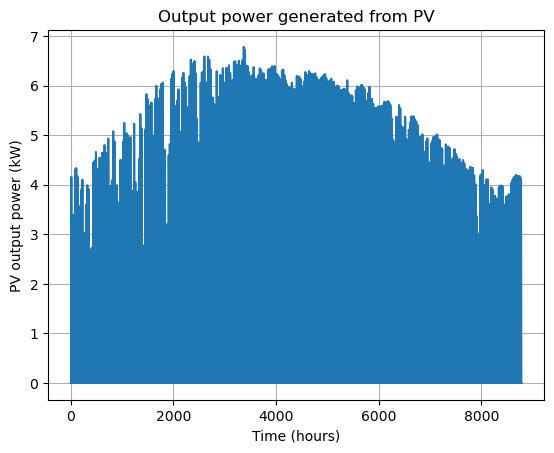

In [4]:
# Parameters for PV output power calculation
Gref = 1000  # Reference solar radiation (W/m^2)
NOCT = 45  # Nominal cell operating temperature
kt = -3.7e-3  # Temperature coefficient
Tref = 25  # Temperature at reference condition
pv_eff = 7.3  # Solar panel efficiency (rated power under reference condition)

# Calculate cell temperature
Tc = ambient_temperature + ((NOCT - 20) / 800) * solar_irradiance

# Calculate PV output power
PV_out = (pv_eff * (solar_irradiance / Gref)) * (1 + kt * (Tc - Tref))

# Plot PV output power
plt.plot(PV_out)
plt.xlabel('Time (hours)')
plt.ylabel('PV output power (kW)')
plt.title('Output power generated from PV')
plt.grid(True)
plt.show()
